In [ ]:
# Importing Important Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
import warnings
from IPython.display import Markdown

---
#### CS 280 Final Project - FA23
---

# **Decoding Movie Trends: Exploring Cultural Shifts and Audience Preferences**

### By: Max Sarko and Destiny Deleon


---

## Section 1 - Introduction

The transition from books to film marks a significant shift in storytelling. Over time, we've observed a movement away from traditional written narratives towards the visual and immersive realm of cinema. This evolution has reshaped the way stories are told, experienced, and embraced by audiences worldwide. Through film, storytelling has gained a new dimension, captivating audiences with vivid imagery, vibrant emotions, and an engaging visual narrative that complements the traditional written word.
<br><br>
As a result of this transition from text to screen, it is crucial to identify any trends and patterns that may enable the cinema industry to fit the desires of the audiences and generate the most profit. In this report, we looked into film data to uncover trends and shifts in audience preferences, using the variables within the dataset to find association with higher net gross on average.
<br><br>
In order to manage the workload effectively and create impactful results, we opted to rank the importance of various variables in the dataset, which is delved into deeper in the **introduction of the results section**. We specifically focused on five variables that we found intriguing and beleived would reveal compelling insights: Film Genre, Critic Score, Movie Star, Film Directors, and Movie Run Time.
<br><br>
In a concise summary of our findings, we observed that following the most common genre, which turned out to be comedy, did not necessarily correlate with a positive association with average net gross. Moreover, we found the range with 95% confidence that true mean average score for films fell into. Our examination of the average scores for the top seven most featured actors and directors in films spanning three decades within the dataset revealed that Tom Hanks, as a leading actor, and Woody Allen, as a director, were associated with higher average scores compared to their counterparts. Furthermore, our analysis of film run-times indicated that durations ranging from 75 to 200 minutes were linked to higher net gross compared to other durations.

---

## Section 2 - Data


The dataset used in this report was obtained from Kaggle and was created by user ASHISH JAYSWAL. This information for this dataset was collected using various official movie information sources (one mentioned source in the dataset's about section was IMDb) and was last updated 5 months ago. This dataset features release years from 1980 to 2001.

<br>

The original source of the data can be found on the Kaggle website. Click [here](https://www.kaggle.com/datasets/ashishkumarjayswal/movies-updated-data) to view the dataset used in this report.

<br>

Below you will find the code that imports the the csv version of the dataset from our GitHub and loads the first 7 rows as a simple visualization of what the dataset features. The variables (columns) of the dataset will be explained later in this section.

<br>

If you would like to visit our GitHub to view the original CSV version of the Dataset or to see our proposal on the dataset, click [here](https://github.com/MaxSarko/CS280FinalProjectWork.git).

---

### 2.1 - Code used to Import the Datatset

In [ ]:
# importing the data in CSV format from GitHub
movies_data = pd.read_csv("https://raw.githubusercontent.com/MaxSarko/CS280FinalProjectWork/main/movies_updated.csv")

# removing the ,, after runtime
movies_data['runtime'] = movies_data['runtime,,'].apply(lambda time: time.replace(time[-1],''))

# converting the typing of runtime to a float
movies_data['runtime'] = movies_data['runtime'].astype('float')

# Creating a possible days and possible months list to seperate the released column
possible_days = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19',
                 '20','21','22','23','24','25','26','27','28','29','30','31']
possible_months = ['June', 'July', 'May', 'December', 'October', 'September',
       'February', 'April', 'August', 'March', 'November', 'January']

# Creating a movie_release_day column by seperating the original release day value in the relased column and filling with nan if no day is present
movies_data['movie_release_day'] = movies_data['released'].apply(lambda date: int(date.replace(',',' ').split()[1]) if
                                                               date.replace(',',' ').split()[1] in possible_days else np.nan)

# Creating a movie_release_month column by seperating the original release month value in the relased column and filling with nan if no month is present
movies_data['movie_release_month'] = movies_data['released'].apply(lambda date: date.replace(',',' ').split()[0] if
                                                               date.replace(',',' ').split()[0] in possible_months else ...)

# Creating a movie_release_country column by seperating the original release country value in the relased column and filling with nan if no country is present
movies_data['movie_release_country'] = movies_data['released'].apply(lambda date: date.replace(')','').split('(')[-1])

# Changing year to release_year to fit the format of the rest of the dataset
movies_data['release_year'] = movies_data['year']

# Creating a calculated field net gross by subtracting the budget from the gross
movies_data['net_gross'] = movies_data['gross'] - movies_data['budget']

# Dropping columns that were changed or updated
movies_data = movies_data.drop(columns=['year', 'released', 'runtime,,'])

# Renaming columns to fit the same standard of naming convention as the rest of the dataframe
movies_data = movies_data.rename(columns = {'country':'film_country', 'runtime':'run_time'})

# Showing the first 7 rows
movies_data.head(7)

,name,rating,genre,score,votes,director,writer,star,film_country,budget,gross,company,run_time,movie_release_day,movie_release_month,movie_release_country,release_year,net_gross
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,13.0,June,United States,1980,27998772.0
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,2.0,July,United States,1980,54353106.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,20.0,June,United States,1980,520375067.0
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,2.0,July,United States,1980,79953539.0
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,25.0,July,United States,1980,33846344.0
5,Friday the 13th,R,Horror,6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601.0,Paramount Pictures,95.0,9.0,May,United States,1980,39204601.0
6,The Blues Brothers,R,Action,7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890.0,Universal Pictures,133.0,20.0,June,United States,1980,88229890.0


### 2.2 - Summary of Variables within the Movies Data Table

**Categorical Variables**
* *name*
    * Number of Missing Values: **0**
    * Contains **3971** Distinct Values:
        * ***The Shining***
        * ***The Blue Lagoon***
        * ***Star Wars: Episode V - The Empire Strikes Back***
        * ***Airplane!***
        * ***Caddyshack***
    * The name column represents all the names of the movies represented in the data.
* *rating*
    * Number of Missing Values: **40**
    * Contains **11** Distinct Values:
        * 'R'
        * 'PG'
        * 'G'
        * nan
        * 'Not Rated'
        * 'NC-17'
        * 'Approved'
        * 'TV-PG'
        * 'PG-13'
        * 'Unrated'
        * 'X'
        * 'TV-MA'
    * The Rating Column shows what the audience should be for a movie, specifically focusing on the age. Legal definitions for most TV and movie rating types can be found here https://www.spectrum.net/support/tv/tv-and-movie-ratings-descriptions. Unrated and Not Rated both identify a movie as having not official rating at the current movies. Approved means that the film has been approved to show to the public but is not going to be rated. NC-17 along with X both mean no one 17 and under are admitted to the movie.
* *genre*
    * Number of Missing Values: **0**
    * Contains **17** Distinct Values:
        * 'Drama'
        * 'Adventure'
        * 'Action'
        * 'Comedy'
        * 'Horror'
        * 'Biography'
        * 'Crime'
        * 'Fantasy'
        * 'Family'
        * 'Sci-Fi'
        * 'Animation'
        * 'Romance'
        * 'Music'
        * 'Western'
        * 'Thriller'
        * 'History'
        * 'Mystery'
    * The genre represents a general idea for what the film watchers should expect the film to be about. For example, romance tends to have some love between two characters that may be comedic or may be forbidden. Animation shows a style where none of the characters are real but rather animated. Mystery has aspects to it that are like a puzzle you are trying to solve.
* *director*
    * Number of Missing Values: **0**
    * Contains **1678** Distinct Values:
        * 'Stanley Kubrick'
        * 'Randal Kleiser'
        * 'Irvin Kershner'
        * 'Jim Abrahams'
        * 'Harold Ramis'
    * A movie director is the creative visionary responsible for guiding the artistic and dramatic aspects of a film, overseeing everything from the script to the performances and the visual style to bring the story to life on screen. They orchestrate the elements of a movie, shaping its storytelling, visual aesthetics, and overall tone to fulfill their vision for the film.
* *writer*
    * Number of Missing Values: **1**
    * Contains **2685** Distinct Values:
        * 'Stephen King'
        * 'Henry De Vere Stacpoole'
        * 'Leigh Brackett'
        * 'Jim Abrahams'
        * 'Brian Doyle-Murray'
    * A movie writer creates the story, characters, and dialogue that form the blueprint for a film's narrative. They craft the plot and the words spoken by the characters, providing the foundation upon which the movie is built.
* *star*
    * Number of Missing Values: **1**
    * Contains **1655** Distinct Values:
        * 'Jack Nicholson'
        * 'Brooke Shields'
        * 'Mark Hamill'
        * 'Robert Hays'
        * 'Chevy Chase'
    * A movie star is the actor or actress who plays a prominent role in a film, often recognized for their fame, talent, and leading presence on screen. They're the face of the movie, meant to draw in the audience. Often, they recieve the most payment compared to other actors within the movie
* *film_country*
    * Number of Missing Values: **0**
    * Contains **44** Distinct Values:
        * 'United Kingdom'
        * 'United States'
        * 'South Africa'
        * 'West Germany'
        * 'Canada'
    * The country column represents the country that the movie was filmed in, seperate from the country the movie was released in.
* *company*
    * Number of Missing Values: **10**
    * Contains **1305** Distinct Values:
        * 'Warner Bros.'
        * 'Columbia Pictures'
        * 'Lucasfilm'
        * 'Paramount Pictures'
        * 'Orion Pictures'
    * The movie company refers to the collective group or organization involved in the production, financing, and distribution of a film, comprising various professionals, investors, and entities collaborating to bring a movie to life and share it with audiences.
* *movie_release_month*
    * Number of Missing Values: **0**
    * Contains **13** Distinct Values:
        * 'June'
        * 'July'
        * 'May'
        * 'December'
        * 'October'
        * 'September'
        * 'February'
        * 'April'
        * 'August'
        * 'March'
        * 'November'
        * 'January'
        * Ellipsis
    * The movie release month refers to the month that the film was originally released in, not filmed in. Movies without a specified release data were given the ellipsis status, otherwise the month was in one of the given 12 months
* *movie_release_country*
    * Number of Missing Values: **0**
    * Contains **40** Distinct Values:
        * 'United States'
        * 'Australia'
        * 'Japan'
        * 'Ireland'
        * 'Argentina'
    * The movie realease country refers to the country that the movie was originally released in, not filmed in. There a 40 unique countries for movies to be released in in this dataset.

**Continuous Variables**
* *score*
    * Number of Missing Values: **0**
    * Units: **Points**
    * Maximum Value: **9.3**
    * Minimum Value: **2.2**
    * Average Value: **6.2**
* *run_time*
    * Number of Missing Values: **0**
    * Units: **Minutes**
    * Maximum Value: **357.0**
    * Minimum Value: **1.0**
    * Average Value: **105.6**



**Quantitative Discrete Variables**
* *votes*
    * Number of Missing Values: **0**
    * Maximum Value: **2400000**
    * Minimum Value: **51**
    * Average Value: **54494.5**
* *budget*
    * Number of Missing Values: **0**
    * Units: **Dollars**
    * Maximum Value: **200000000**
    * Minimum Value: **0**
    * Average Value: **15427403**
* *gross*
    * Number of Missing Values: **169**
    * Units: **Dollars**
    * Maximum Value: **2201647264**
    * Minimum Value: **309**
    * Average Value: **41722023**
* *movie_release_day*
    * Number of Missing Values: **53**
    * Units: **Dollars**
    * Maximum Value: **31**
    * Minimum Value: **1**
    * Average Value: **16**
* *release_year*
    * Number of Missing Values: **0**
    * Units: **Years**
    * Maximum Value: **2001**
    * Minimum Value: **1980**
    * Average Value: **1991.1915**
* *net_gross*
    * Number of Missing Values: **169**
    * Units: **Dollars**
    * Maximum Value: **2001647264.0**
    * Minimum Value: **-98301101.0**
    * Average Value: **25677031.37300966**



### 2.3 - Code used to Summarize Variables

In [ ]:
#****************************CATEGORICAL****************************************
#Descriptive Stats for name
name_dictionary = {}
name_dictionary['null_num'] = movies_data['name'].isna().sum()
name_dictionary['distinct_num'] = movies_data['name'].nunique()
name_dictionary['distinct_values'] = movies_data['name'].head(5).unique()
#Descriptive Stats for rating
rating_dictionary = {}
rating_dictionary['null_num'] = movies_data['rating'].isna().sum()
rating_dictionary['distinct_num'] = movies_data['rating'].nunique()
rating_dictionary['distinct_values'] = movies_data['rating'].unique()
#Descriptive Stats for genre
genre_dictionary = {}
genre_dictionary['null_num'] = movies_data['genre'].isna().sum()
genre_dictionary['distinct_num'] = movies_data['genre'].nunique()
genre_dictionary['distinct_values'] = movies_data['genre'].unique()
#Descriptive Stats for director
director_dictionary = {}
director_dictionary['null_num'] = movies_data['director'].isna().sum()
director_dictionary['distinct_num'] = movies_data['director'].nunique()
director_dictionary['distinct_values'] = movies_data['director'].head(5).unique()
#Descriptive Stats for writer
writer_dictionary = {}
writer_dictionary['null_num'] = movies_data['writer'].isna().sum()
writer_dictionary['distinct_num'] = movies_data['writer'].nunique()
writer_dictionary['distinct_values'] = movies_data['writer'].head(5).unique()
#Descriptive Stats for star
star_dictionary = {}
star_dictionary['null_num'] = movies_data['star'].isna().sum()
star_dictionary['distinct_num'] = movies_data['star'].nunique()
star_dictionary['distinct_values'] = movies_data['star'].head(5).unique()
#Descriptive Stats for country
film_country_dictionary = {}
film_country_dictionary['null_num'] = movies_data['film_country'].isna().sum()
film_country_dictionary['distinct_num'] = movies_data['film_country'].nunique()
film_country_dictionary['distinct_values'] = movies_data['film_country'].unique()
#Descriptive Stats for company
company_dictionary = {}
company_dictionary['null_num'] = movies_data['company'].isna().sum()
company_dictionary['distinct_num'] = movies_data['company'].nunique()
company_dictionary['distinct_values'] = movies_data['company'].head(5).unique()
#Descriptive Stats for movie release month
release_month_dictionary = {}
release_month_dictionary['null_num'] = movies_data['movie_release_month'].isna().sum()
release_month_dictionary['distinct_num'] = movies_data['movie_release_month'].nunique()
release_month_dictionary['distinct_values'] = movies_data['movie_release_month'].unique()
#Descriptive Stats for movie release month
release_country_dictionary = {}
release_country_dictionary['null_num'] = movies_data['movie_release_country'].isna().sum()
release_country_dictionary['distinct_num'] = movies_data['movie_release_country'].nunique()
release_country_dictionary['distinct_values'] = movies_data['movie_release_country'].unique()
#****************************CONTINUOUS*****************************************
#Descriptive Stats for score
score_dictionary = {}
score_dictionary['null_num'] = movies_data['score'].isna().sum()
score_dictionary['MAX'] = movies_data['score'].max()
score_dictionary['MIN'] = movies_data['score'].min()
score_dictionary['AVERAGE'] = movies_data['score'].mean()
#Descriptive Stats for runtime
runtime_dictionary = {}
runtime_dictionary['null_num'] = movies_data['run_time'].isna().sum()
runtime_dictionary['MAX'] = movies_data['run_time'].max()
runtime_dictionary['MIN'] = movies_data['run_time'].min()
runtime_dictionary['AVERAGE'] = movies_data['run_time'].mean()
#****************************QUANITATIVE DISCRETE*******************************
#Descriptive Stats for votes
votes_dictionary = {}
votes_dictionary['null_num'] = movies_data['votes'].isna().sum()
votes_dictionary['MAX'] = movies_data['votes'].max()
votes_dictionary['MIN'] = movies_data['votes'].min()
votes_dictionary['AVERAGE'] = movies_data['votes'].mean()
#Descriptive Stats for budget
budget_dictionary = {}
budget_dictionary['null_num'] = movies_data['budget'].isna().sum()
budget_dictionary['MAX'] = movies_data['budget'].max()
budget_dictionary['MIN'] = movies_data['budget'].min()
budget_dictionary['AVERAGE'] = movies_data['budget'].mean()
#Descriptive Stats for gross
gross_dictionary = {}
gross_dictionary['null_num'] = movies_data['gross'].isna().sum()
gross_dictionary['MAX'] = movies_data['gross'].max()
gross_dictionary['MIN'] = movies_data['gross'].min()
gross_dictionary['AVERAGE'] = movies_data['gross'].mean()
#Descriptive Stats for release day
release_day_dictionary = {}
release_day_dictionary['null_num'] = movies_data['movie_release_day'].isna().sum()
release_day_dictionary['MAX'] = movies_data['movie_release_day'].max()
release_day_dictionary['MIN'] = movies_data['movie_release_day'].min()
release_day_dictionary['AVERAGE'] = movies_data['movie_release_day'].mean()
#Descriptive Stats for release year
release_year_dictionary = {}
release_year_dictionary['null_num'] = movies_data['release_year'].isna().sum()
release_year_dictionary['MAX'] = movies_data['release_year'].max()
release_year_dictionary['MIN'] = movies_data['release_year'].min()
release_year_dictionary['AVERAGE'] = movies_data['release_year'].mean()
#Descriptive Stats for net gross
net_gross_dictionary = {}
net_gross_dictionary['null_num'] = movies_data['net_gross'].isna().sum()
net_gross_dictionary['MAX'] = movies_data['net_gross'].max()
net_gross_dictionary['MIN'] = movies_data['net_gross'].min()
net_gross_dictionary['AVERAGE'] = movies_data['net_gross'].mean()
#*******Input Dictionary Name Below to See Descriptive Results******************
release_month_dictionary

{'null_num': 0,
 'distinct_num': 13,
 'distinct_values': array(['June', 'July', 'May', 'December', 'October', 'September',
        'February', 'April', 'August', 'March', 'November', 'January',
        Ellipsis], dtype=object)}

---
## Section 3 - Results

"We aimed to discover which factors contribute most to a movie's financial success. We ranked various dataset variables based on their perceived importance during our casual viewing. Though a basic approach, it helped us identify features that might have an association with higher average net gross for movies."
<br>
<br>
Listed below is the ranking we decided of variables we decided to investigate in the dataset.
1. Genre
2. Score
3. Star
4. Director
5. Runtime

Please note that we didn't include all variables from the dataset. We focused solely on the these 5 variables, believing they were most likely to reveal trends regarding features that contribute the most to average net gross success.
<br>

### 3.1 - Trends in Genre

Genres serve as indicators of a movie's story or style, aiding viewers in finding films that match their preferences. Each film genre comes with distinct production costs, target audiences, and levels of popularity. Can analyzing genre trends guide us to a conclusion? Our dataset includes 17 unique genres. We looked to simultaneously examine all genres alongside their budget and gross (please note, this refers to the movie gross, not the net gross).

#### Figure 3.1.1

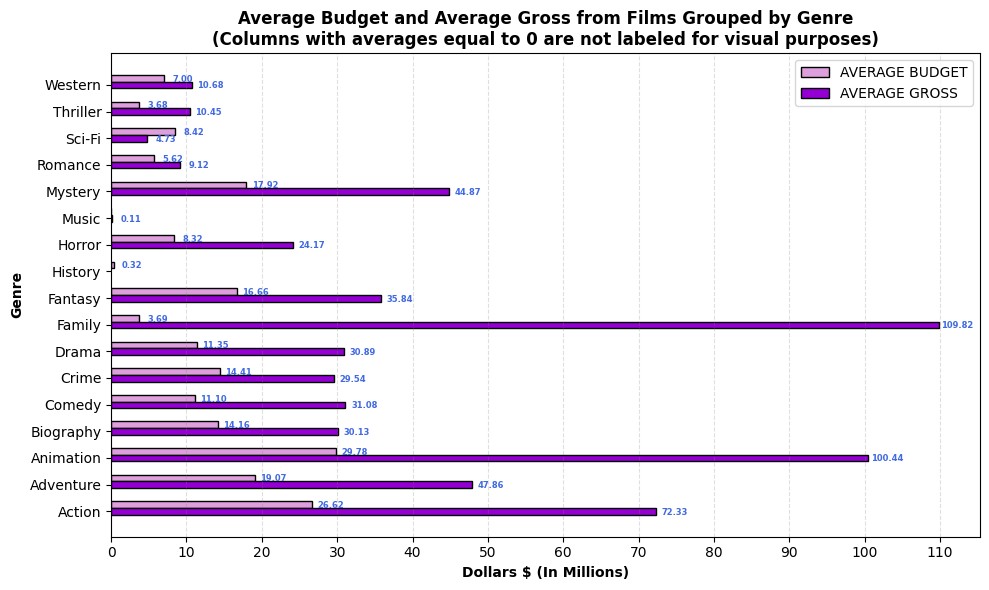

In [ ]:
# Setting up a dataframe for averages in every variable grouped by the genre
genre_budget_gross = movies_data[['genre','gross','budget']].groupby('genre').mean()

# Seperation variable so the bars are not stacked
ind = np.arange(0, 20* len(genre_budget_gross), 20) + 1

# Vis 1 - Movie Budget vs Gross Colored By Genre
# Width of the bars
width = .3

# figsize
plt.figure(figsize=(10,6))

# Bar graph for the budget
bar1 = plt.barh(ind+5, genre_budget_gross['budget']/1000000, label ='AVERAGE BUDGET',
                color = 'plum', edgecolor = 'black', linewidth = 1, height = 5)

# Bar graph for the gross
bar2 = plt.barh(ind, genre_budget_gross['gross']/1000000, label ='AVERAGE GROSS',
                color = 'darkviolet', edgecolor = 'black', linewidth = 1,
                height = 5)

# Setting the y ticks to the unique values of the genre column
plt.yticks(ind + width / 2, genre_budget_gross.index)

# Generating labels for every bar length
for rect in bar1 + bar2:
    height = rect.get_width()
    if height > 0:
      plt.text(height + 2.5, rect.get_y() + rect.get_height() / 2.0 - 4, f'{height:.2f}'
      , ha='center', va='bottom', size = 6, color = "royalblue", weight = "bold")

# Updating the graph to make it easier to read
plt.title("Average Budget and Average Gross from Films Grouped by Genre\n(Columns with averages equal to 0 are not labeled for visual purposes)",
          weight = "bold")
plt.xlabel("Dollars $ (In Millions)", weight = "bold")
plt.ylabel("Genre", weight = "bold")
plt.xticks(np.arange(0, 120, step=10))
plt.legend()

# Changing the layout and grid
plt.tight_layout()
plt.grid(axis = "x", linestyle = "dashed", color = "gray", alpha = .25)

# Showing the plot
plt.show()

After examining the visual, we observed that family movies typically exhibit the best budget-to-gross ratio. In contrast, history movies tend to underperform, generating no gross despite their budget. Most movies yield approximately double their budget as gross income, with genres like horror, action, and drama often surpassing this mark by earning more than twice their budget in returns.
<br>
<br>
Does this imply that producing a family film guarantees the highest chance of a higher average net gross? Unfortunately, that's not the case. The dataset spans from 2001 to 1980. This graph represents the average budget and gross across all years, and assuming that this graph distrubtes all films equally in every genre is unrealistic. Therefore, we decided to investigate further.
<br>
<br>
Below we created a visualization of the most common movie genre throughout all the years, and then the most common movie genre in the last 5 years present in the dataset (1996-2001)

**Percentages of Movie Genres Throughout All Years Sorted From Highest to Lowest**

In [ ]:
# Getting the proportions, showing that comedy is the highest amount by a notable margin
pd.DataFrame(movies_data['genre'].value_counts(normalize = True)).transpose()

,Comedy,Drama,Action,Crime,Adventure,Biography,Horror,Animation,Fantasy,Mystery,Thriller,Romance,Family,Sci-Fi,Western,Music,History
genre,0.33875,0.20175,0.19375,0.0755,0.05775,0.04375,0.0395,0.02825,0.00825,0.00325,0.00275,0.002,0.002,0.0015,0.00075,0.00025,0.00025


**Percentages of Movie Genres Throughout Recent Years (1986-2001) Sorted From Highest to Lowest**

In [ ]:
# Getting the proportions, showing that comedy remains the highest amount by a notable margin
pd.DataFrame(movies_data[movies_data['release_year'] > 1985]['genre'].value_counts(normalize = True)).transpose()

,Comedy,Drama,Action,Crime,Adventure,Biography,Horror,Animation,Fantasy,Mystery,Romance,Thriller,Family,Sci-Fi,Western
genre,0.33988,0.203358,0.196072,0.08204,0.053532,0.044979,0.031992,0.029458,0.008869,0.004118,0.001901,0.001584,0.001267,0.000634,0.000317


Breaking down these two dataframes, we can see that a very small percentage of films are actually listed under the family genre, with even less films being in the family genre in the most recent years compared to throughout all the years. Intresting enough, comedy takes up a large precentage of all years present in the dataset and the most recent years, both marginally more than 1/3. This lead us to a discovery, since a notably higher percentage of films are in the comedy, both throughout all years and through recent years, does this mean comedy's on average produce the highest proportion of net gross since they are the most commonly made type of film? We decided to test question by preforming permutation testing to find the observed difference in average net gross of comedy films compared to non-comedy films, and to verify that that the net gross of comedy films did not happen by chance alone.

<br>
Side Note: If you were curious as to why the average net gross was so high for the movies classified as family, there was eight total movies in this genre, and out of these eight, six of them had a budget of 0! That meant the average only took 2 values for the budget while it had 8 values for gross. All 8 of the films labeled as family produced a gross atleast in the millions!

In [ ]:
# Creating a column in the original dataframe for a True/False for if a movies genre is comedy or not (this will be used for the permutation testing)
overall_comedy = movies_data[movies_data['genre']=='Comedy']
movies_data['isComedy'] = movies_data['name'].isin(overall_comedy['name'])

# Recent movies dataset
recent_movies = movies_data[movies_data['release_year'] > 1995]

# Creating a sub-dataframe with only movies listed as comedy for their genre
comedy = recent_movies[(recent_movies['genre']=='Comedy')] # This should be 33.875% of all the movies

# Creating a sub-dataframe with only movies not listed as comedy for their genre
not_comedy = recent_movies[~recent_movies['name'].isin(comedy['name'])]

# Verifying the proportions are correct and the lengths match up
print(f'Amount of Comedy Movies: {len(comedy)}\nAmount of Non-Comedy Movies: {len(not_comedy)}\nTotal Amount of Movies: {len(recent_movies)}')

Amount of Comedy Movies: 396
Amount of Non-Comedy Movies: 761
Total Amount of Movies: 1157


We started by seperating films labeled under the comedy genre into a dataframe and seperating all those not labeled as comedy into another. We showed the counts of movies to ensure no movies were missed and that the correction proportion of comedy movies are in the recent movies dataset. This allows us to effectively find the average net gross for comedies compared to non-comedies in recent years which will lead to the observed difference so we could do our permutation testing.

In [ ]:
# Gathering comedy statistics
stats_comedy = comedy.describe()

# Saving the net gross average (for our observed test statistic difference in means equation)
mean_net_gross_comedy = stats_comedy.loc["mean"]['net_gross']

# Gathering non-comedy statistics
stats_not_comedy = not_comedy.describe()

# Saving the net gross average (for our observed test statistic difference in means equation)
mean_net_gross_not_comedy = stats_not_comedy.loc["mean"]['net_gross']

# Creating our observed test statistic difference in means (to be used in our permutation graph and p_value calculation)
observed_test_statistic_diff_mean_net_gross = mean_net_gross_comedy - mean_net_gross_not_comedy

print(f'Average Net Gross of Comedy Movies (in Millions): {mean_net_gross_comedy/1000000}\nAverage Net Gross of Non-Comedy Movies (in Millions): {mean_net_gross_not_comedy/1000000}\nObserved Difference in Average Net Gross (in Millions): {observed_test_statistic_diff_mean_net_gross/1000000}')

Average Net Gross of Comedy Movies (in Millions): 24.14878187179487
Average Net Gross of Non-Comedy Movies (in Millions): 43.943664520000006
Observed Difference in Average Net Gross (in Millions): -19.79488264820513


Above you can see the listed values for the average net gross of comedy movies, the average net gross for non comedy movies, and the difference between the two for recent movies (1986-2001). The average net gross for comedy movies sits around 24 million, while the average net gross for non comedy movies sits around a staggering 44 million, with a difference of about 20 million between the two.  

#### Figure 3.1.2

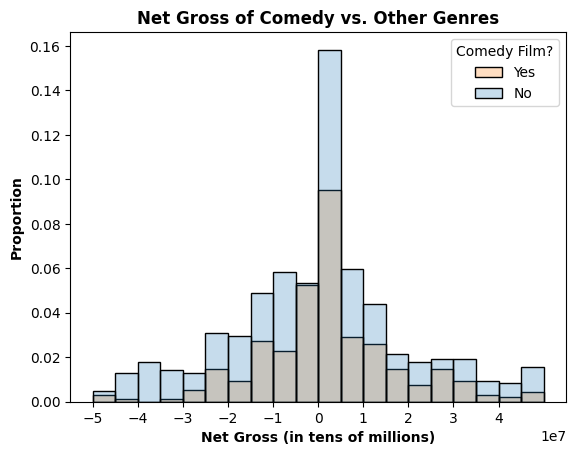

In [ ]:
# Generating a histplot based on the net gross of a film and if it is comedy or not based on the newly created column
sns.histplot(recent_movies, x = "net_gross", hue = "isComedy",alpha = 0.25, binwidth=.1*50000000, binrange=(-.5*100000000,.5*100000000), stat = 'proportion')

# Plot Formatting
plt.title("Net Gross of Comedy vs. Other Genres", weight = "bold")
plt.xlabel('Net Gross (in tens of millions)', weight = "bold")
plt.ylabel('Proportion', weight = "bold")
plt.legend(title='Comedy Film?', labels=['Yes', 'No'])
plt.xticks(np.arange(-.5*100000000,.5*100000000, .1*100000000));

Above is a histogram plot representing the proportions of net gross from comedy films compared to non-comedy films. Note that these are the proportions of the entire dataset of films from 1996-2001, and with comedy only being 33% of this data, we should expect the bars to be smaller. This visual allowed a demonstration of the variability within the comedy versus non comedy movies in terms of net gross (in the graph it is by tens of millions). It seems that both peak around -.5 to .5, with the comedy films being more left skewed compared to the non-comedy which is spaced more evenly.
<br>
<br>
Now that we have had everything set up, and we had our observed difference in the dataset for the average net gross of comedy films minus the average net gros of non-comedy films at -20 million, we could preform our permutation test. Before we started, we needed to develop a null and alternative hypothesis to test on so we could determine if comedy films produced a higher average net gross. Due to our focus being on the if comedy films produce **higher** average net gross, our permutation testing is one sided, focusing on results higher than our observed test statistic. Below we stated our null and alternative hypothesis.

*Null and Alternative Hypothesis in Words:*

* **NULL HYPOTHESIS**: A movie being a comedy has no association with the true average net gross of a film

* **ALTERNATIVE HYPOTHESIS**:  A movie being a comedy has an positive association with the true average net gross of a film



*Null and Alternative Hypothesis in Symbols:*
<br>

$$\text{NULL HYPOTHESIS: } \mu_C = \mu_{NC}$$

$$\text{ALTERNATIVE HYPOTHESIS:  } \mu_C > \mu_{NC} $$

$$\text{NOTE:  } \mu_S \text{ represents the true mean of the net gross for comedy films population }$$

$$\text{NOTE:  } \mu_{NC} \text{ represents the true mean of the net gross for non-comedy films population }$$

It is important to note that in order to have a successful permutation testing, we preformed the permutation under the belief that the null hypothesis was true, meaning that a movie being a comedy had no association with the true average net gross of a film

In [ ]:
warnings.simplefilter(action='ignore')

# Under the assumption movie genre has no effect on net gross of a film

# Number of iterations
num_iterations = 10000

# Empty numpy array to hold results
many_diffs_in_mean_net_gross_after_shuffling = np.array([])

# For loop
for i in range(num_iterations):

    # Creating a shuffled column with a random permutation of the isComedy column
    recent_movies['shuffled_comedy'] = np.random.permutation(recent_movies['isComedy'])

    # Getting the movies that are now labeled as comedy
    comedy_after_shuffling = recent_movies[recent_movies["shuffled_comedy"] == True]

    # Getting the movies that are now labeled as not-comedy
    not_comedy_after_shuffling = recent_movies[recent_movies["shuffled_comedy"] == False]

    # Finding the difference in means for net gross
    difference_in_means = comedy_after_shuffling["net_gross"].mean() - not_comedy_after_shuffling["net_gross"].mean()

    # Appending our results to the numpy array
    many_diffs_in_mean_net_gross_after_shuffling = np.append(many_diffs_in_mean_net_gross_after_shuffling, difference_in_means)

many_diffs_in_mean_net_gross_after_shuffling

array([ 4792253.91425641,  2076394.43261538,  1162684.21730056, ...,
       -2148765.94401184,  6216935.72192076, -2371035.13841626])

#### Figure 3.1.3

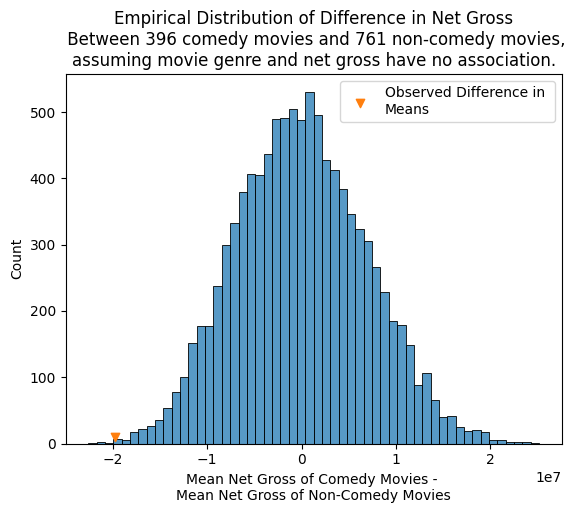

In [ ]:
# Generating a histplot of our many differences in mean net gross
sns.histplot(many_diffs_in_mean_net_gross_after_shuffling)

# Adding a point for our observed difference in mean net gross
plt.scatter(observed_test_statistic_diff_mean_net_gross, 10, label='Observed Difference in \nMeans', marker = "v")

# Plot formatting
plt.title(f"Empirical Distribution of Difference in Net Gross\n Between {len(comedy)} comedy movies and {len(not_comedy)} non-comedy movies,\nassuming movie genre and net gross have no association.")
plt.xlabel("Mean Net Gross of Comedy Movies - \nMean Net Gross of Non-Comedy Movies")
plt.legend();

Above we graphed the empirical distribution of all the permutation tests we just generated in the previous code cell. Even before calculating the p-value, we could tell that the results were not looking promising. If we wanted to conclude that a film being in the comedy genre could be a factor in generating a higher average net gross, then we would have wanted the observed difference in means to be in on the right side of the empirical distribution.

In [ ]:
# Calculating the p-value
p_value_net_gross = np.count_nonzero((many_diffs_in_mean_net_gross_after_shuffling >= observed_test_statistic_diff_mean_net_gross
                                      ))/len(many_diffs_in_mean_net_gross_after_shuffling)
print(f'P-Value: {p_value_net_gross:.3f}\nStandard Alpha: .05')

P-Value: 1.000
Standard Alpha: .05


So what did this P-Value mean? If there is no association between a movie being a comedy and its net gross than there is essentially a 99% chance that we would ever observe a difference in mean net gross (comedy - non-comedy) of -19.79488264820513 million or more. Due to the P-Value being almost 100%, our results are not statistically significant, and we do not reject the null hypothesis that a movie being a comedy has no association with the true average net gross of a film. It appears that the difference in net gross can be explained by random chance alone. There is evidence to support that a movie being comedy does not actually make a difference.
<br>
<br>
Unfortunately, our testing on genre trends and average net gross for films did not lead to any helpful conclusion. Could we have done more testing with genres to see if we could find trends that did show promising results? Yes, we could have checked different genres and found that some genres produce higher average net gross compared to the other genres. The problem that arises is that as we check different genres that have less movies in the recent years (1996 - 2001), we are left with less reason to believe they will actually produce a higher net gross as we have less evidence in the dataset compared to comedy which made up 33 percent of all films in those years. Therefore, we decided to move onto the critic score to see if we could stumble across any valuable information in that variable.

### 3.2 - Critic Scores

It is well versed that critics' scores on films offer guidance to audiences and wield significant influence on a film's success, impacting box office numbers, industry recognition, and cultural discussions. Although the score out of 10 a movie recieves is decided alone by the critics who view it and the creators of the film itself have very little say, analzying the score and average net gross a film recieves can help determine the importance of this variable. Note that we went into the analysis with the understanding that a film that got a perfect 10/10 score would make a lot more in terms of average net gross compared to a film that got a 1/10 score, we wanted to focus more on the difference between higher scores (such as 9/10 to 10/10) to see how much of a difference score makes, if at all.

#### Figure 3.2.1


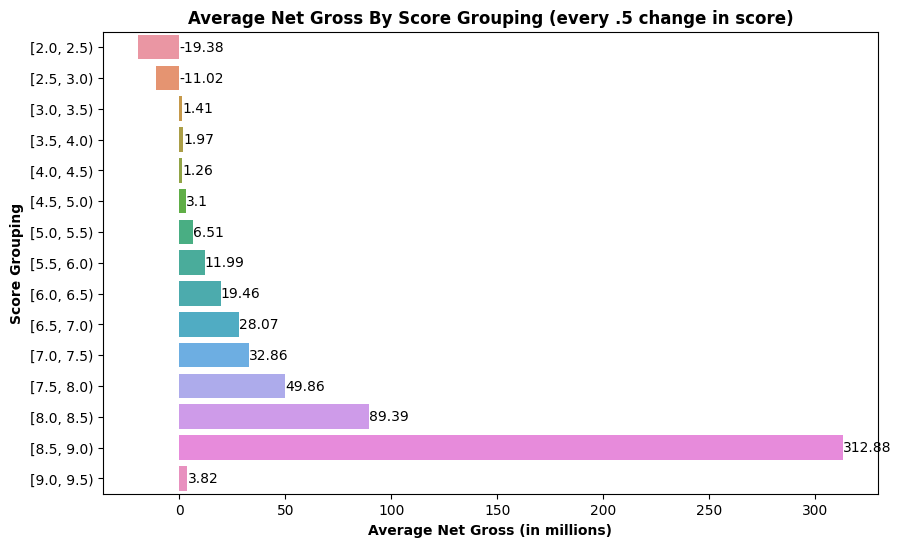

In [ ]:
warnings.simplefilter(action='ignore')

# Creating a datafrime with only score and net gross
score_and_net_gross_averages = movies_data[['score','net_gross']]

# Creating a grouping column for the scores
score_and_net_gross_averages['group'] = pd.cut(score_and_net_gross_averages['score'],
                                               bins=[i/2 for i in range(4, 20)], precision=1, right=False)

# Creating a counts dataframe to be used in later analysis
counts = score_and_net_gross_averages.groupby('group').count().rename(columns = {'score':'count_of_movies'})

# Creating a  dataframe for the score grouping and the average net gross
score_and_net_gross_averages = score_and_net_gross_averages[['group','net_gross']].groupby('group').mean().reset_index()

# Changing the name and dividing by 1 million to make the graph simpler
score_and_net_gross_averages['average_net_gross'] = score_and_net_gross_averages['net_gross']/1000000

# Labeling the axis' for ease of visual
plt.figure(figsize=(10,6))
ax = sns.barplot(score_and_net_gross_averages, x = 'average_net_gross', y = 'group', orient = 'h')
for p in ax.patches:
    if p.get_width() < 0:  # Check for negative bars
        ax.text(0.05, p.get_y() + p.get_height() / 2, round(p.get_width(),2),
                ha='left', va='center')
    else: # For posotive bars
        ax.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2, round(p.get_width(),2),
                ha='left', va='center')

#Formatting for the plot
plt.title('Average Net Gross By Score Grouping (every .5 change in score)', weight = "bold")
plt.xlabel('Average Net Gross (in millions)', weight = "bold")
plt.ylabel('Score Grouping', weight = "bold")
plt.show();


In this graph we grouped all of our films by rating for every .5 change in score, and plotted them with their average net gross in a barplot (note that no films in the dataset had a higher score than 9.3). We went into this hoping to notice a nice downward slope, showing that as the score increased the average net gross increased aswell. For this graph that statement was very accurate, for the most part. We see that as the score increases, so does the average net gross, although the slope of the graph in not nearly as linear as we expected. We can see that scores less than 3 actually produced a negative average net gross! The two big suprises in this graph were the average net gross of the 8.5 to less than 9 score range, and the 9 to less than 9.5 score range. We decided to look further into these rating to find out why they were such outliers from the rest of the graph, so we started with finding the counts of movies in each rating group.


In [ ]:
# Movie counts visualization
counts[['count_of_movies']].transpose()

group,"[2.0, 2.5)","[2.5, 3.0)","[3.0, 3.5)","[3.5, 4.0)","[4.0, 4.5)","[4.5, 5.0)","[5.0, 5.5)","[5.5, 6.0)","[6.0, 6.5)","[6.5, 7.0)","[7.0, 7.5)","[7.5, 8.0)","[8.0, 8.5)","[8.5, 9.0)","[9.0, 9.5)"
count_of_movies,1,11,15,46,80,194,355,595,803,821,622,327,107,22,1


Now that we can see the counts per grouping, it was made much more obvious why there was such variability towards the end of the barplot and why there was negatives in the front. The two groupings on the lower end and the two groupings on the higher end for score had much less movies compared to the scores in the middle groupings. The movies that had the lowest rating was *Leonard Part 6* at a score of 2.2, while the highest rating was *The Shawshank Redemption* at a score of 9.3.
<br>
<br>
Although this explained the highest and lowest end of the spectrum, this didn't fully explain why the 8.5 to less than 9 range was so incredibly high comparatively to the rest of the groupings. There was still 22 films in this grouping, so logically the average net gross should be at a somewhat reasonable level compared to the rest of the scores. We decided to investigate further by viewing all movies in this grouping.

In [ ]:
movies_data[movies_data['score']>=8.5]

,name,rating,genre,score,votes,director,writer,star,film_country,budget,gross,company,run_time,movie_release_day,movie_release_month,movie_release_country,release_year,net_gross,isComedy
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,5.383751e+08,Lucasfilm,124.0,20.0,June,United States,1980,5.203751e+08,False
645,Back to the Future,PG,Adventure,8.5,1100000,Robert Zemeckis,Robert Zemeckis,Michael J. Fox,United States,19000000,3.819068e+08,Universal Pictures,116.0,3.0,July,United States,1985,3.629068e+08,False
1257,Cinema Paradiso,PG,Drama,8.5,239000,Giuseppe Tornatore,Giuseppe Tornatore,Philippe Noiret,Italy,5000000,1.301906e+07,Cristaldifilm,155.0,23.0,February,United States,1988,8.019063e+06,False
1643,Goodfellas,R,Biography,8.7,1100000,Martin Scorsese,Nicholas Pileggi,Robert De Niro,United States,25000000,4.696328e+07,Warner Bros.,146.0,21.0,September,United States,1990,2.196328e+07,False
1843,Terminator 2: Judgment Day,R,Action,8.5,1000000,James Cameron,James Cameron,Arnold Schwarzenegger,United States,102000000,5.208812e+08,Carolco Pictures,137.0,3.0,July,United States,1991,4.188812e+08,False
1845,The Silence of the Lambs,R,Crime,8.6,1300000,Jonathan Demme,Thomas Harris,Jodie Foster,United States,19000000,2.727429e+08,Strong Heart/Demme Production,118.0,14.0,February,United States,1991,2.537429e+08,False
2247,Schindler's List,R,Biography,8.9,1200000,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000,3.221612e+08,Universal Pictures,195.0,4.0,February,United States,1993,3.001612e+08,False
2443,The Shawshank Redemption,R,Drama,9.3,2400000,Frank Darabont,Stephen King,Tim Robbins,United States,25000000,2.881729e+07,Castle Rock Entertainment,142.0,14.0,October,United States,1994,3.817291e+06,False
2444,Pulp Fiction,R,Crime,8.9,1900000,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000,2.139288e+08,Miramax,154.0,14.0,October,United States,1994,2.059288e+08,False
2445,Forrest Gump,PG-13,Drama,8.8,1900000,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000,6.782261e+08,Paramount Pictures,142.0,6.0,July,United States,1994,6.232261e+08,False


Unfortunately, after we looked throroughly through the data, even after we attempted to run some groupings and other forms of tests, we really could not find any trends. It seemed that the movies had a healthy variation in all of the variables, with no real notable pattern, which was extremely disappointing since this would have been a great leap in determing the variables important in best possible average net gross. Fortunately for us, this graph does still provide an amazing amount of insight. Creating a score to average net gross ratio allowed us to have a fair assesment for average net gross. When working with this dataset, we were unable to find any evidence to prove that the data accounts for inflation, so this provided a safety measure to ensure no bias.
<br>
<br>
Seeing how the scores for films where not even spread out among the grouping, almost like the shape of a bell curve, we decided to investigate into the idea of what would be the most likely score someone creating a film would receive, so that we could relate this to our previous graph on scores and average net gross. We landed on the idea that bootsampling would allow us to effectively test this idea.

#### Figure 3.2.2

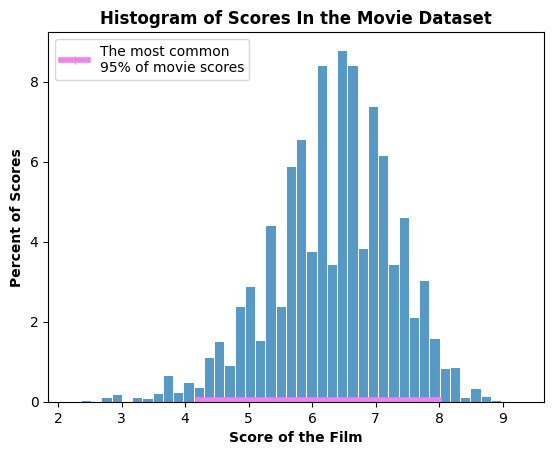

In [ ]:
movies_data_sort_score = movies_data.sort_values(by = 'score',  ascending = True)

left_endpoint = np.percentile(movies_data_sort_score["score"], 2.5, method = 'higher') #4.2
right_endpoint = np.percentile(movies_data_sort_score["score"], 97.5, method = 'higher') # 8.0

sns.histplot(movies_data_sort_score["score"],ec = "white", stat='percent')
plt.plot([left_endpoint, right_endpoint], [.05, .05], color = 'violet', linewidth = 4, marker = '|',
        label = 'The most common\n95% of movie scores')
plt.title('Histogram of Scores In the Movie Dataset', weight = "bold")
plt.xlabel('Score of the Film', weight = "bold")
plt.ylabel('Percent of Scores', weight = "bold")
plt.legend();

We determined that we should work around a 95% confidence interval, since decreasing the confidence interval would leave out values and increasing the this confidence interval was uneccessary. The graph above showed the overall distribution percentages of the film scores, along with a line to represent the values within the 2.5 percentile to the 97.5 percentile. Understanding how the distribution looks before bootstrapping is important in understanding the data that we were working with. We then decided to take a singular sample to check is likeness in distribution to the original data distribution. This would ensure that our samples will hopefully accurately represent the data.

#### Figure 3.2.3

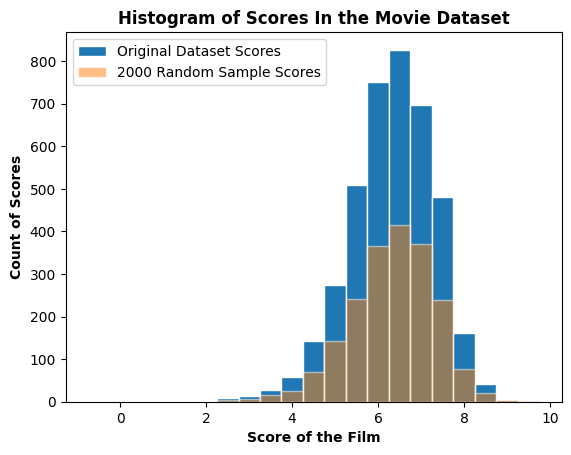

In [ ]:
movies_data_genre_score = movies_data_sort_score[['genre', 'score']]
original_sample = movies_data_genre_score.sample(2000, replace = False)

plt.hist(movies_data_genre_score["score"], bins=np.arange(-0.75, 10.25, .5), ec = "white", label = 'Original Dataset Scores')
plt.hist(original_sample["score"], bins=np.arange(-0.75, 10.25, .5), ec = "white", alpha = 0.5, label = '2000 Random Sample Scores');
plt.title('Histogram of Scores In the Movie Dataset', weight = "bold")
plt.xlabel('Score of the Film', weight = "bold")
plt.ylabel('Count of Scores', weight = "bold")
plt.legend();

From the graph above we could see that the sample of 2000 did indeed fit the orignal data well. The sample consists of a similar shape with peaks and drops at similar points. This ensured that we could continue on with the bootstrapping!

In [ ]:
num_bootstraps = 10000

results_many_bootstraps = np.array([])


while len(results_many_bootstraps) < num_bootstraps:

    #Generate the bootstrap from the original sample
    boostrap_sample = original_sample.sample(2000, replace = True)

    #Calculate the statistic value on the bootstrap
    bootstrap_mean = boostrap_sample["score"].mean()

    #Add it to the array\
    results_many_bootstraps = np.append(results_many_bootstraps, bootstrap_mean)

results_many_bootstraps  #Contains the simulated statistics (here  averages) from many different bootstrap samples

sorted_results = np.sort(results_many_bootstraps)
left_endpoint = np.percentile(sorted_results, 2.5)
right_endpoint = np.percentile(sorted_results, 97.5)

# Print left and right endpoints
print(f'Left Endpoint: {left_endpoint:3f}\nRight Endpoint: {right_endpoint:.3f}')

Left Endpoint: 6.292599
Right Endpoint: 6.379


#### Figure 3.2.4

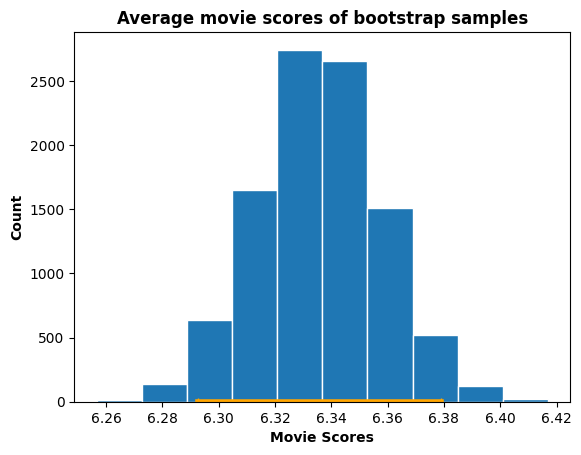

In [ ]:
plt.hist(results_many_bootstraps, ec = "white", zorder = 1)
plt.ylabel("Count", weight = "bold")
plt.xlabel("Movie Scores", weight = "bold")
plt.title("Average movie scores of bootstrap samples", weight = "bold");

plt.plot([left_endpoint, right_endpoint], [1, 1],
         color = "orange",
         linewidth=4,
         zorder = 2,
         marker = '|');

In [ ]:
# Since the markdown cells are static and the range is dynamic, this function allows the markdown cell to change
markdown_text = f"<font size='3'>So what did this graph represent? We are 95% confident that the true average of movie scores is between {left_endpoint:.3f} and {right_endpoint:.3f}. Based on our previous graph, thats about 19.46 million dollars in average net gross, which is not bad at all. But did we want to be satisfied saying that the film would be in the average? No, we want to find the best way to have the highest average net gross, so we want to find the best chance of increasing our films score, and thats where the star of the movie came in.</font>"
Markdown(markdown_text)

<font size='3'>So what did this graph represent? We are 95% confident that the true average of movie scores is between 6.293 and 6.379. Based on our previous graph, thats about 19.46 million dollars in average net gross, which is not bad at all. But did we want to be satisfied saying that the film would be in the average? No, we want to find the best way to have the highest average net gross, so we want to find the best chance of increasing our films score, and thats where the star of the movie came in.</font>

### 3.3 - Trends in Movie Stars

A movie star can be the gravitational force that pulls audiences into a film, infusing it with charisma and star power that elevates its appeal. Their presence often serves as a magnet, drawing attention, anticipation, and fostering an immediate connection between the audience and the movie. If we want to find how to have the highest average net gross for the best chance of success in creating a film, we don't want to be satisfied with an average score, we wanted to find the best score within reason. So we wanted to question: can a the star of a movie impact the score of the movie and hopefully lead to a higher average net gross based on our previous shown score to net average gross graph?
<br>
<br>
In order to keep with the idea of trends, we decided to check the 7 most popular stars by count of movies they were in, and the average score of their movies, compared to the total average score of all other actors not included in the 7 most popular actors. We would sort this by decade, since actors popularity rarely contiues through decades (as we see later). We believed that if a movie star was appeared frequently in movies throughout the years, then it should be safe to assume that their movies had more success, otherwise what would be the reason behind the actor being in such high demand?

In [ ]:
# Creating a decade column
movies_data['decade'] = (movies_data['release_year'] // 10) * 10


# Grouping by decade and star with the score field
top_7_most_common_stars = (movies_data[['star','score','decade']].groupby(
    ['decade','star']).count().sort_values
     (by = ['decade',"score"], ascending = False)).rename(columns = {'score':'movies'})

# Taking the 7 largest stars per decade
sev_stars_per_decade = pd.DataFrame(top_7_most_common_stars.groupby('decade')['movies'].nlargest(7))

# Droping duplicated keys and ressetting index
sev_stars_per_decade = sev_stars_per_decade.reset_index(level=0, drop=True).reset_index()

# Creating top 7 stars per decade movie results dataframe
stars_list = movies_data.merge(sev_stars_per_decade).groupby(['star','decade']
                                                             ).mean(numeric_only = True).reset_index()

# Creating a stars per decade movie results dataframe with top 7 depending on decade
the_other_guys = movies_data[~movies_data.isin(sev_stars_per_decade
                                                  )].groupby(['decade']
                                                             ).mean(numeric_only = True).reset_index()

# Combining the two together
combination = pd.concat([stars_list,the_other_guys])

# Replacing null of star name field with other stars
combination['star'] = combination['star'].fillna('Other Stars')

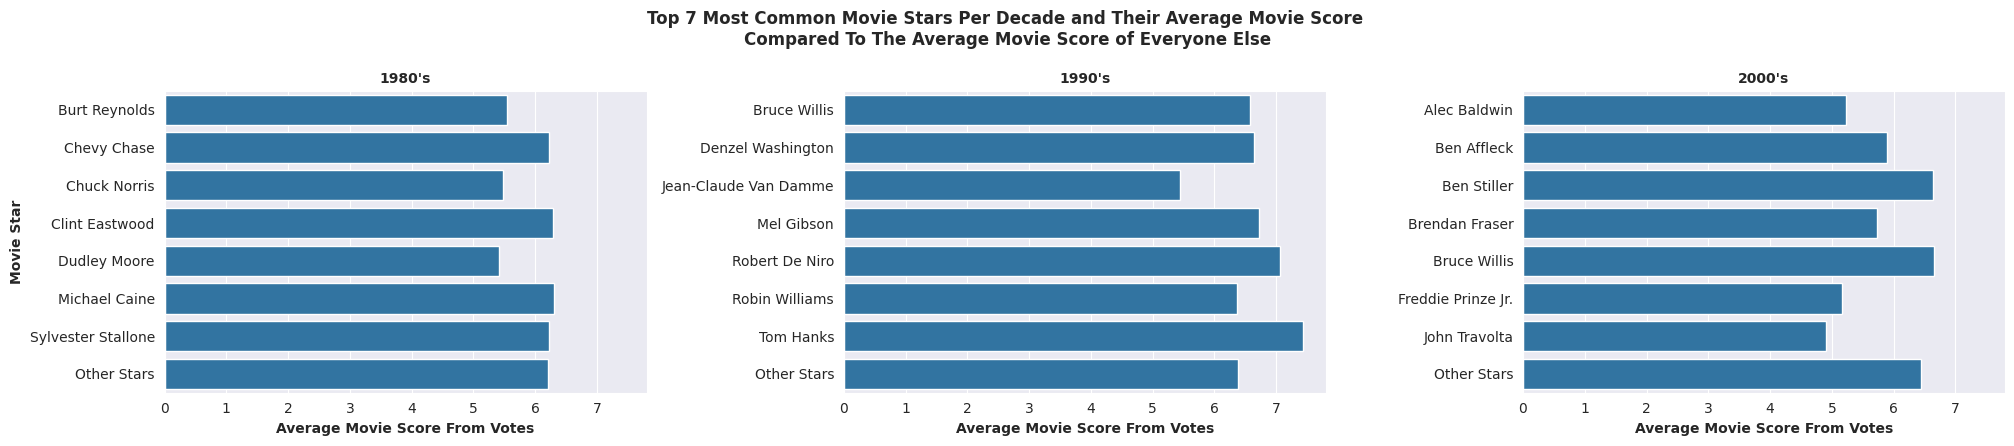

In [ ]:
# Hiding User Warning for this graph
warnings.simplefilter(action='ignore', category=UserWarning)

# Using dark grid theme to make the graph more visible
sns.set_style("darkgrid")

# Creating a facet grid based on the combination table with the columns as decade
g = sns.FacetGrid(combination, col="decade", height=4.5, aspect=1.5, col_wrap=3, sharey = False, despine=False)

# Maping a barplot with score and star to the facet grid
g.map(sns.barplot, "score", 'star')

# Setting titles of the facet grid
g.set_titles(col_template=str("{col_name:.0f}")+"'s", weight = "bold")

# Setting axis labels of the facet grid
g.set_axis_labels("Average Movie Score From Votes", "Movie Star", weight = "bold")

# Adjusting the position of the subplots
g.fig.subplots_adjust(top=.8)

# Giving a title to the facet plot
g.fig.suptitle('Top 7 Most Common Movie Stars Per Decade and Their Average Movie Score \nCompared To The Average Movie Score of Everyone Else',
               weight = "bold");

Although we featured the 1980's in the graph, we mainly focused on the 1990's and 2000's, as trends of film actor selection in the most recent years would be more helpful to our analysis. Generally, it seemed like most actors average scores that were listed in the top 7 were marginally different than the average scores of all other actors in that decade combined. We did notice a gradual increase in the average score for the other stars overall, but this was not necessarily the case for the top 7 stars. It seems that in the 1980's, the average scores were very consistent, then in the 1990's all scores increased pretty heavily, and finally in the 2000's there was a great deal of variation in the average scores. Tom Hanks was an outlier in this visualization. Throughout all the decades, besides from Rober De Niro who was also in the 90s and barely made it past the average score of 7 threshold, Tom Hanks held a drastically higher average respectively to the other actors. So why was Tom Hanks as popular in the 2000's, since the dataset only went up to 2001, we assumed this may have been the cause, so we decided to check!

In [ ]:
movies_data[(movies_data['star'] == 'Tom Hanks') & (movies_data['release_year'] > 1999)]

,name,rating,genre,score,votes,director,writer,star,film_country,budget,gross,company,run_time,movie_release_day,movie_release_month,movie_release_country,release_year,net_gross,isComedy,decade
3650,Cast Away,PG-13,Adventure,7.8,542000,Robert Zemeckis,William Broyles Jr.,Tom Hanks,United States,90000000,429632142.0,Twentieth Century Fox,143.0,22.0,December,United States,2000,339632142.0,False,2000


Tom Hanks only had 1 movie in the 2000's, specifically the year 2000, and this movie still had a 7.8 score with a gross of 339 million dollars. This is a lot more than our previous graph predicted, which had an average net gross of 49.86 million, but still demonstrates the point that films with Tom Hanks as their star had very high success even into the most updated part of this dataset. So does Tom Hanks garuntee sucess? No, that would be illogical, but from the numbers, it seems that having **Tom Hanks** as the star of a film has the highest average score as of recent in the dataset, and would hopefully lead to the best chance of success in average net gross since we are not able to directly change the score a film recieves. But having a prominent star is not a solo act to lead to success, there a more key aspects behind the scenes. An actor can only go so far, the combination of actor and director is what turn regular movies into masterpieces, so we wanted to check the directors next in a similar manner.

### 3.4 - Trends in Film Directors

A director holds the creative reins, shaping a film's vision, tone, and storytelling, wielding an immense influence on its success and resonance with audiences. Their unique perspective and artistic direction can often define the very essence of a movie, elevating it to a memorable and impactful cinematic experience, and with the right choice of lead, the score and profit of the film can soar. To keep consistency with the actors graph, we performed the visualization of the top 7 directors in different decades and their average score compared to the other directors averages scores in a nearly identical manner.

In [ ]:
# Grouping by decade and director with the score field
top_7_most_common_directors = (movies_data[['director','score','decade']].groupby(
    ['decade','director']).count().sort_values
     (by = ['decade',"score"], ascending = False)).rename(columns = {'score':'movies'})

# Taking the 7 largest stars per decade
sev_directors_per_decade = pd.DataFrame(top_7_most_common_directors.groupby('decade')['movies'].nlargest(7))

# Droping duplicated keys and ressetting index
sev_directors_per_decade = sev_directors_per_decade.reset_index(level=0, drop=True).reset_index()

# Creating top 7 stars per decade movie results dataframe
directors_list = movies_data.merge(sev_directors_per_decade).groupby(['director','decade']
                                                             ).mean(numeric_only = True).reset_index()

# Creating a stars per decade movie results dataframe with top 7 depending on decade
the_other_guys = movies_data[~movies_data.isin(sev_directors_per_decade
                                                  )].groupby(['decade']
                                                             ).mean(numeric_only = True).reset_index()

# Combining the two together
combination = pd.concat([directors_list,the_other_guys])

# Replacing null of star name field with other stars
combination['director'] = combination['director'].fillna('Other Directors')

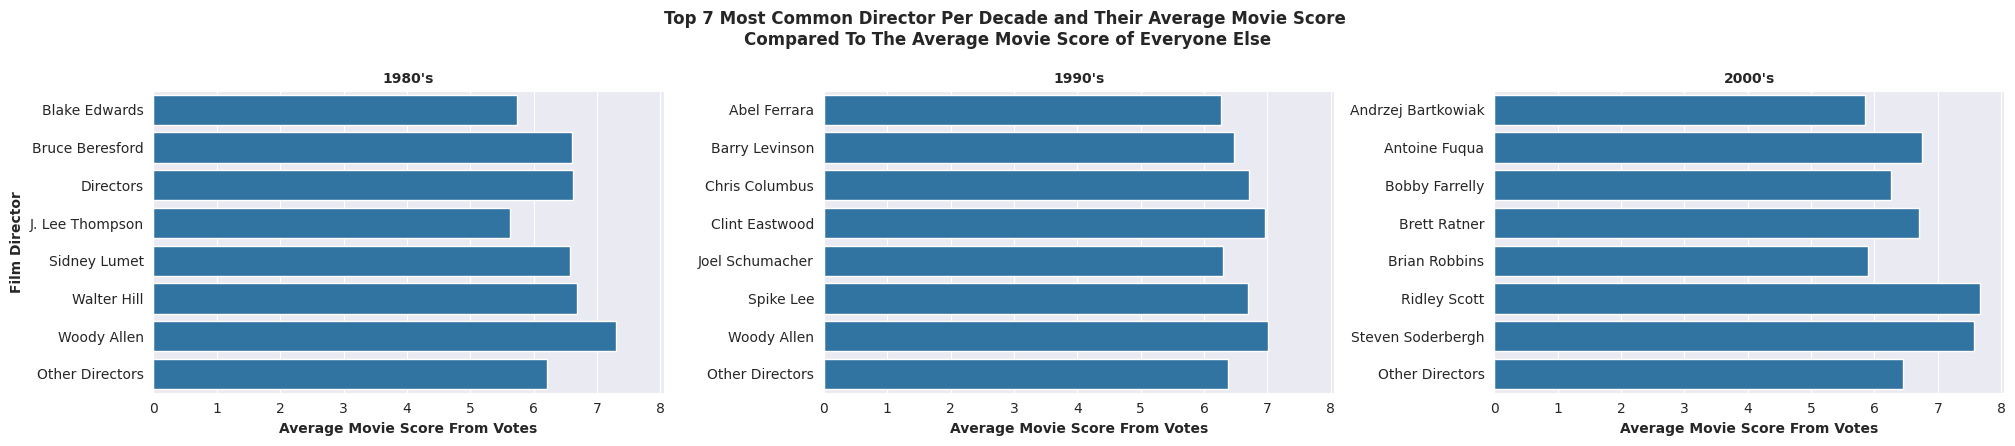

In [ ]:
# Hiding User Warning for this graph
warnings.simplefilter(action='ignore', category=UserWarning)

# Using dark grid theme to make the graph more visible
sns.set_style("darkgrid")

# Creating a facet grid based on the combination table with the columns as decade
g = sns.FacetGrid(combination, col="decade", height=4.5, aspect=1.5, col_wrap=3, sharey = False, despine=False)

# Maping a barplot with score and star to the facet grid
g.map(sns.barplot, "score", 'director')

# Setting titles of the facet grid
g.set_titles(col_template=str("{col_name:.0f}")+"'s", weight = "bold")

# Setting axis labels of the facet grid
g.set_axis_labels("Average Movie Score From Votes", "Film Director", weight = "bold")

# Adjusting the position of the subplots
g.fig.subplots_adjust(top=.8)

# Giving a title to the facet plot
g.fig.suptitle('Top 7 Most Common Director Per Decade and Their Average Movie Score \nCompared To The Average Movie Score of Everyone Else',
               weight = "bold");

As we examined this graph we noticed that the average scores throughout all the decades for the top 7 directors in each decade seemed much higher than those of the actors, while the other directors remained similar in average movie scores to the other actors in the previous graph. The difference in when we viewed this graph is that we focused on all decades equally, not just the 1990's and 2000's. This was due to our belief that an actors popularity often has more variability as they are the main focus of the film compared to the directors who rarely have a popularity factor compared to rankings based on their quality of work. 3 names in this graph stuck out to us. Two of these directors were the outliers in the 2000's, Ridley Scott and Steven Soderbergh, with 7.4+ average movie scores. The third was Woody Allen, who not only was featured in two decades with a 7+ average score in both, but also held the highest average movie score for both of them. We decided to check key details to see which director was truly the best.

In [ ]:
movies_data[(movies_data['director']=='Ridley Scott') & (movies_data['release_year']>1989)]

,name,rating,genre,score,votes,director,writer,star,film_country,budget,gross,company,run_time,movie_release_day,movie_release_month,movie_release_country,release_year,net_gross,isComedy,decade
1851,Thelma & Louise,R,Adventure,7.5,142000,Ridley Scott,Callie Khouri,Susan Sarandon,United States,16500000,45456285.0,Pathé Entertainment,130.0,24.0,May,United States,1991,28956285.0,False,1990
2125,1492: Conquest of Paradise,PG-13,Adventure,6.5,29000,Ridley Scott,Rose Bosch,Gérard Depardieu,United Kingdom,47000000,7191399.0,Gaumont,154.0,9.0,October,United States,1992,-39808601.0,False,1990
2899,White Squall,PG-13,Adventure,6.6,22000,Ridley Scott,Charles Gieg Jr.,Jeff Bridges,United States,38000000,10292300.0,Hollywood Pictures,129.0,2.0,February,United States,1996,-27707700.0,False,1990
3101,G.I. Jane,R,Action,6.0,75000,Ridley Scott,Danielle Alexandra,Demi Moore,United States,50000000,48169156.0,Caravan Pictures,125.0,22.0,August,United States,1997,-1830844.0,False,1990
3645,Gladiator,R,Action,8.5,1400000,Ridley Scott,David Franzoni,Russell Crowe,United States,103000000,465380802.0,Dreamworks Pictures,155.0,5.0,May,United States,2000,362380802.0,False,2000
3855,Black Hawk Down,R,Drama,7.7,372000,Ridley Scott,Mark Bowden,Josh Hartnett,United States,92000000,172989651.0,Revolution Studios,144.0,18.0,January,United States,2001,80989651.0,False,2000
3867,Hannibal,R,Crime,6.8,261000,Ridley Scott,Thomas Harris,Anthony Hopkins,United States,87000000,351692268.0,Metro-Goldwyn-Mayer (MGM),131.0,9.0,February,United States,2001,264692268.0,False,2000


In [ ]:
movies_data[(movies_data['director']=='Steven Soderbergh') & (movies_data['release_year']>1989)]

,name,rating,genre,score,votes,director,writer,star,film_country,budget,gross,company,run_time,movie_release_day,movie_release_month,movie_release_country,release_year,net_gross,isComedy,decade
1960,Kafka,PG-13,Drama,6.9,9600,Steven Soderbergh,Lem Dobbs,Jeremy Irons,France,11000000,1059071.0,Baltimore Pictures,98.0,15.0,November,United States,1991,-9940929.0,False,1990
2355,King of the Hill,PG-13,Drama,7.4,7800,Steven Soderbergh,A.E. Hotchner,Jesse Bradford,United States,8000000,1214231.0,Wildwood Enterprises,103.0,20.0,August,United States,1993,-6785769.0,False,1990
2811,The Underneath,R,Crime,6.1,3400,Steven Soderbergh,Don Tracy,Peter Gallagher,United States,6500000,536023.0,Populist Pictures,99.0,28.0,April,United States,1995,-5963977.0,False,1990
3024,Schizopolis,Not Rated,Comedy,6.8,5300,Steven Soderbergh,Steven Soderbergh,Steven Soderbergh,United States,250000,10580.0,.406 Production,96.0,9.0,April,United States,1996,-239420.0,True,1990
3261,Out of Sight,R,Comedy,7.0,88000,Steven Soderbergh,Elmore Leonard,George Clooney,United States,48000000,77745966.0,Universal Pictures,123.0,26.0,June,United States,1998,29745966.0,True,1990
3534,The Limey,R,Crime,7.0,31000,Steven Soderbergh,Lem Dobbs,Terence Stamp,United States,10000000,3325736.0,Artisan Entertainment,89.0,4.0,August,France,1999,-6674264.0,False,1990
3657,Erin Brockovich,R,Biography,7.4,182000,Steven Soderbergh,Susannah Grant,Julia Roberts,United States,52000000,256271286.0,Universal Pictures,131.0,17.0,March,United States,2000,204271286.0,False,2000
3670,Traffic,R,Crime,7.6,199000,Steven Soderbergh,Simon Moore,Michael Douglas,United States,48000000,207515725.0,Compulsion Inc.,147.0,5.0,January,United States,2000,159515725.0,False,2000
3853,Ocean's Eleven,PG-13,Crime,7.7,531000,Steven Soderbergh,George Clayton Johnson,George Clooney,United States,85000000,450717150.0,Warner Bros.,116.0,7.0,December,United States,2001,365717150.0,False,2000


In [ ]:
movies_data[(movies_data['director']=='Woody Allen') & (movies_data['release_year']>1999)]

,name,rating,genre,score,votes,director,writer,star,film_country,budget,gross,company,run_time,movie_release_day,movie_release_month,movie_release_country,release_year,net_gross,isComedy,decade
3813,Small Time Crooks,PG,Comedy,6.7,38000,Woody Allen,Woody Allen,Woody Allen,United States,25000000,29934477.0,Dreamworks Pictures,94.0,19.0,May,United States,2000,4934477.0,True,2000


Starting with Ridley Scott, we noticed that that was a lot a variation in his average score, which does not build promising results. If we want to get a high net gross, we want to avoid this variation, as the more confident we are in the results the more likely we to get our expected outcome. Moving onto Steven Soderbergh, we noticed a steadily increasing score as the years went on, which is promising, but a lack of movies makes it difficult to confirm he is the best choice. With Woody Allen we are only left to his work in earlier decades, in the 2000's he only had one film made, so we lack the evidence to confirm or deny his possible future impact in the film industry. So based on the evidence of the charts, we were left to believe that choosing **Woody Allen** as the director would have be the safest option in order to achieve a high score based on his averages.

### 3.5 - Movie Run-Time

Now that we had an idea of who we would assign for a director and a star, we wanted to look at the final item in our originally stated 5 most important variables of the film dataset: runtime. The duration of a movie, its run-time, is a crucial element that shapes the audience's engagement and the depth of storytelling.
<br>
<br>
In order to find the optimal range for a movies run-time with the highest average net gross (since in terms of movie run-time, a range is more reasonable of expectation), we decided to use a scatter plot of all runtime and their respective net gross, along with a regression line to show the relationship between the two variables.

In [ ]:
# Linear regression will not work with the NaNs in the netGross column
dropping_nas = movies_data.dropna()
x_runtime  = dropping_nas[['run_time']] #needs to  be a dataframe
y_net_gross = dropping_nas[['net_gross']] #needs to  be a dataframe

linear_regressor_runtime_net_gross = lm.LinearRegression()  # create model object
linear_regressor_runtime_net_gross.fit(x_runtime, y_net_gross);      # fit the model

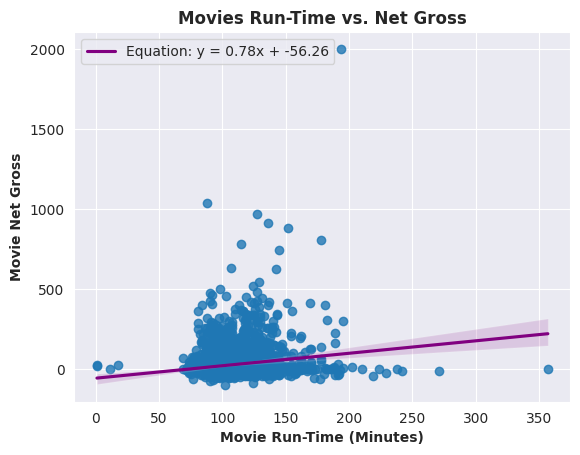

In [ ]:
# Give slope and y-intercept for the regresion line
slope_coeffs = linear_regressor_runtime_net_gross.coef_[0][0]/1000000
intercept = linear_regressor_runtime_net_gross.intercept_[0]/1000000
reg_line_label = f'Equation: y = {slope_coeffs:.2f}x + {intercept:.2f}'

# Plot Scatter Plot with Regresion line
sns.regplot(data = dropping_nas, x = 'run_time', y = dropping_nas['net_gross']/1000000,
            line_kws = {'color': 'purple', 'label':reg_line_label})

plt.title('Movies Run-Time vs. Net Gross', weight = 'bold')
plt.xlabel("Movie Run-Time (Minutes)", weight = 'bold')
plt.ylabel("Movie Net Gross", weight = 'bold');
plt.legend()

Unfortunately, our regression line did little to help, as our points in the plot were shaped more like a bell curve than a line. Despite this, the visual gave valuable insight into where most of the movies reside in terms of run time, and where the movies start rising in net growth. We could see than in the range of about **75 to 250** minutes is where most of the points are clustered, with a few outliers outside of this range. We also notice a heavier rise in the range of **75 to 200** for the net gross, giving us a basic idea for what range of time a film should aim for if it wants to maximize and secure a healthy net growth.

---

## Section 4 - Conclusion

Our exploration journeyed from traditional written stories to the captivating world of cinema, revealing a shift in storytelling dimensions. We aimed to connect audience preferences with film profitability, exploring variables like Genre, Critic Score, Stars, Directors, and Run Time. Surprisingly, the most common genre, comedy, didn't consistently correlate with higher earnings. We also pinpointed a range with a 95% chance that the true average score for films fell into (between 6.293 and 6.379)​. Additionally, when focusing on the avaliable decades in the dataser, we found notable actors like Tom Hanks and director Woody Allen tended to yield higher scores and net gross. Finally, we found that, in general, having a film run time in the range of 75 to 200 had the strongest association with higher average net gross​.

While these insights offer valuable glimpses into film dynamics, further exploration awaits. Examining changing audience tastes across eras and integrating demographic data could enhance our understanding. Additionally, exploring global markets and diverse viewing platforms may unveil strategies for the industry's future. In essence, our dataset journey illuminated intriguing trends, leaving avenues for deeper investigations into the ever-evolving cinematic world.